# 參數優化 - 將歷史報酬提升數倍的方式！

這個單元中，我們首先要來撰寫一個獲利的策略

寫一個策略，首先要來將我們之前爬到的數據拿出來

## 拿出歷史大盤數據

In [1]:
from finlab.data import Data

data = Data()
twii = data.get('發行量加權股價指數')
twii = twii[(twii.index.second == 0)]['台股指數']

D:\miniconda3\envs\finlab\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<AxesSubplot:xlabel='date'>

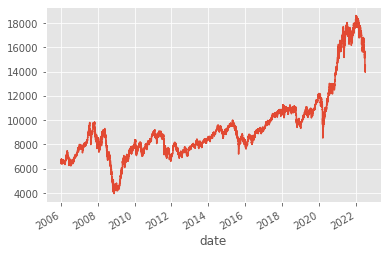

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

twii.plot()

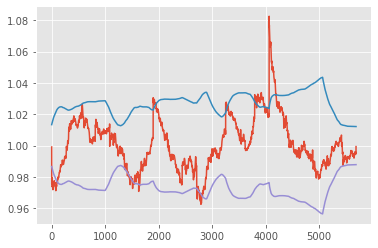

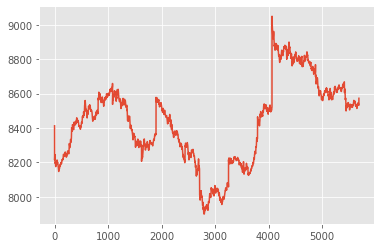

In [3]:
sma = twii.rolling(500).mean()
bias = twii / sma
ub =1+ bias.rolling(1000).std() * 2
lb = 1 - bias.rolling(1000).std() * 2

import matplotlib.pyplot as plt

plt.plot(bias['2008-03'].values)
plt.plot(ub['2008-03'].values)
plt.plot(lb['2008-03'].values)
plt.show()
plt.plot(twii['2008-03'].values)

## 乖離率策略

7089.3600000000115

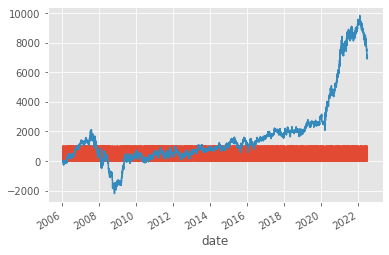

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

def strategy(m1=500, m2=1000, m3=1, m4=1, draw_plot=False):
    
    
    sma = twii.rolling(m1).mean()

    bias = (twii / sma)
    ub = 1 + bias.rolling(m2).std() * m3
    lb = 1 - bias.rolling(m2).std() * m4
    
    buy = (bias < lb) 
    sell = (bias > ub)

    hold = pd.Series(np.nan, index=sell.index)
    hold[buy] = 0
    hold[sell] = 1
    hold = hold.ffill()

    returns = twii.shift(-2) - twii.shift(-1)
    
    
    
    returns[hold == 0] = 0
    returns -= hold.diff().abs() * 3

    creturn = returns.cumsum()
    
    
    
    if draw_plot:
        (hold*1000).plot()
        creturn.plot()
    
     
    return creturn.dropna()[-1]

    
strategy(draw_plot=True)

## 乖離率優化

In [6]:
vmax = 0
for m1 in range(500, 2000, 200):
    for m2 in range(400, 800, 20):
        v = strategy(m1, m2, 1, 1)
        if v > vmax:
            vmax = v
            print(vmax, m1, m2, 1, 1)

5593.089999999984 500 400 1 1
5982.839999999987 500 460 1 1
6046.64 500 480 1 1
6207.430000000013 500 500 1 1
6710.9900000000125 500 520 1 1
6904.990000000003 500 560 1 1
7053.050000000019 500 580 1 1
7630.660000000027 500 600 1 1
7719.080000000007 500 700 1 1
7803.190000000011 500 740 1 1
7866.209999999997 500 760 1 1
8075.080000000005 500 780 1 1
11081.219999999976 700 400 1 1
11199.909999999996 700 420 1 1
11881.700000000019 700 460 1 1
12504.069999999994 900 400 1 1
13067.370000000012 900 420 1 1
13335.480000000001 900 520 1 1
13449.560000000012 900 540 1 1


## 繪製出歷史報酬

11102.119999999997

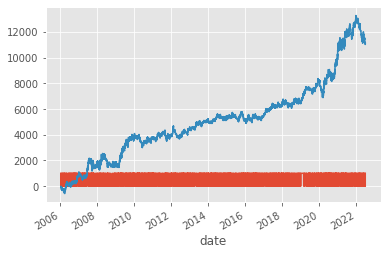

In [7]:
strategy(1300, 780, 1, 1, draw_plot=True)